# Final Project Heart Attack Classification by PatternSeeker

## Import Library

In [175]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression # langsung pilih satu algoritma klasifikasi saja
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Import Data

In [115]:
df = pd.read_csv('https://raw.githubusercontent.com/Pattern-Seeker/heart-attack-classification/refs/heads/main/heart_attack_prediction_dataset.csv')
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


## 1.&nbsp;EDA

In [116]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [118]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


In [119]:
df['Sex'].value_counts()  # imbalanced dataset, ada kelas mayoritas (Sex = Male), ada kelas minoritas (Sex = Female)

,count
Sex,
Male,6111
Female,2652


In [120]:
df['Sex'].value_counts(normalize=True)*100

,proportion
Sex,
Male,69.736392
Female,30.263608


In [121]:
df['Family History'].value_counts()

,count
Family History,
0,4443
1,4320


In [122]:
df['Smoking'].value_counts() # imbalanced dataset, ada kelas mayoritas (Smoking = 1), ada kelas minoritas (Smoking = 0)

,count
Smoking,
1,7859
0,904


In [123]:
df['Smoking'].value_counts(normalize=True)*100

,proportion
Smoking,
1,89.683898
0,10.316102


In [124]:
df['Diabetes'].value_counts()

,count
Diabetes,
1,5716
0,3047


In [125]:
df['Diabetes'].value_counts(normalize=True)*100

,proportion
Diabetes,
1,65.228803
0,34.771197


In [126]:
df['Obesity'].value_counts()

,count
Obesity,
1,4394
0,4369


In [127]:
df['Diet'].value_counts()

,count
Diet,
Healthy,2960
Average,2912
Unhealthy,2891


In [128]:
df['Stress Level'].value_counts()

,count
Stress Level,
2,913
4,910
7,903
9,887
8,879
3,868
1,865
5,860
6,855


In [129]:
df['Country'].value_counts()

,count
Country,
Germany,477
Argentina,471
Brazil,462
United Kingdom,457
Australia,449
Nigeria,448
France,446
Canada,440
China,436


In [130]:
df['Continent'].value_counts()

,count
Continent,
Asia,2543
Europe,2241
South America,1362
Australia,884
Africa,873
North America,860


In [131]:
df['Hemisphere'].value_counts()

,count
Hemisphere,
Northern Hemisphere,5660
Southern Hemisphere,3103


In [132]:
df['Heart Attack Risk'].value_counts()

,count
Heart Attack Risk,
0,5624
1,3139


In [133]:
df['Heart Attack Risk'].value_counts(normalize=True)*100

,proportion
Heart Attack Risk,
0,64.178934
1,35.821066


In [134]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


**Cek Distribusi Data**

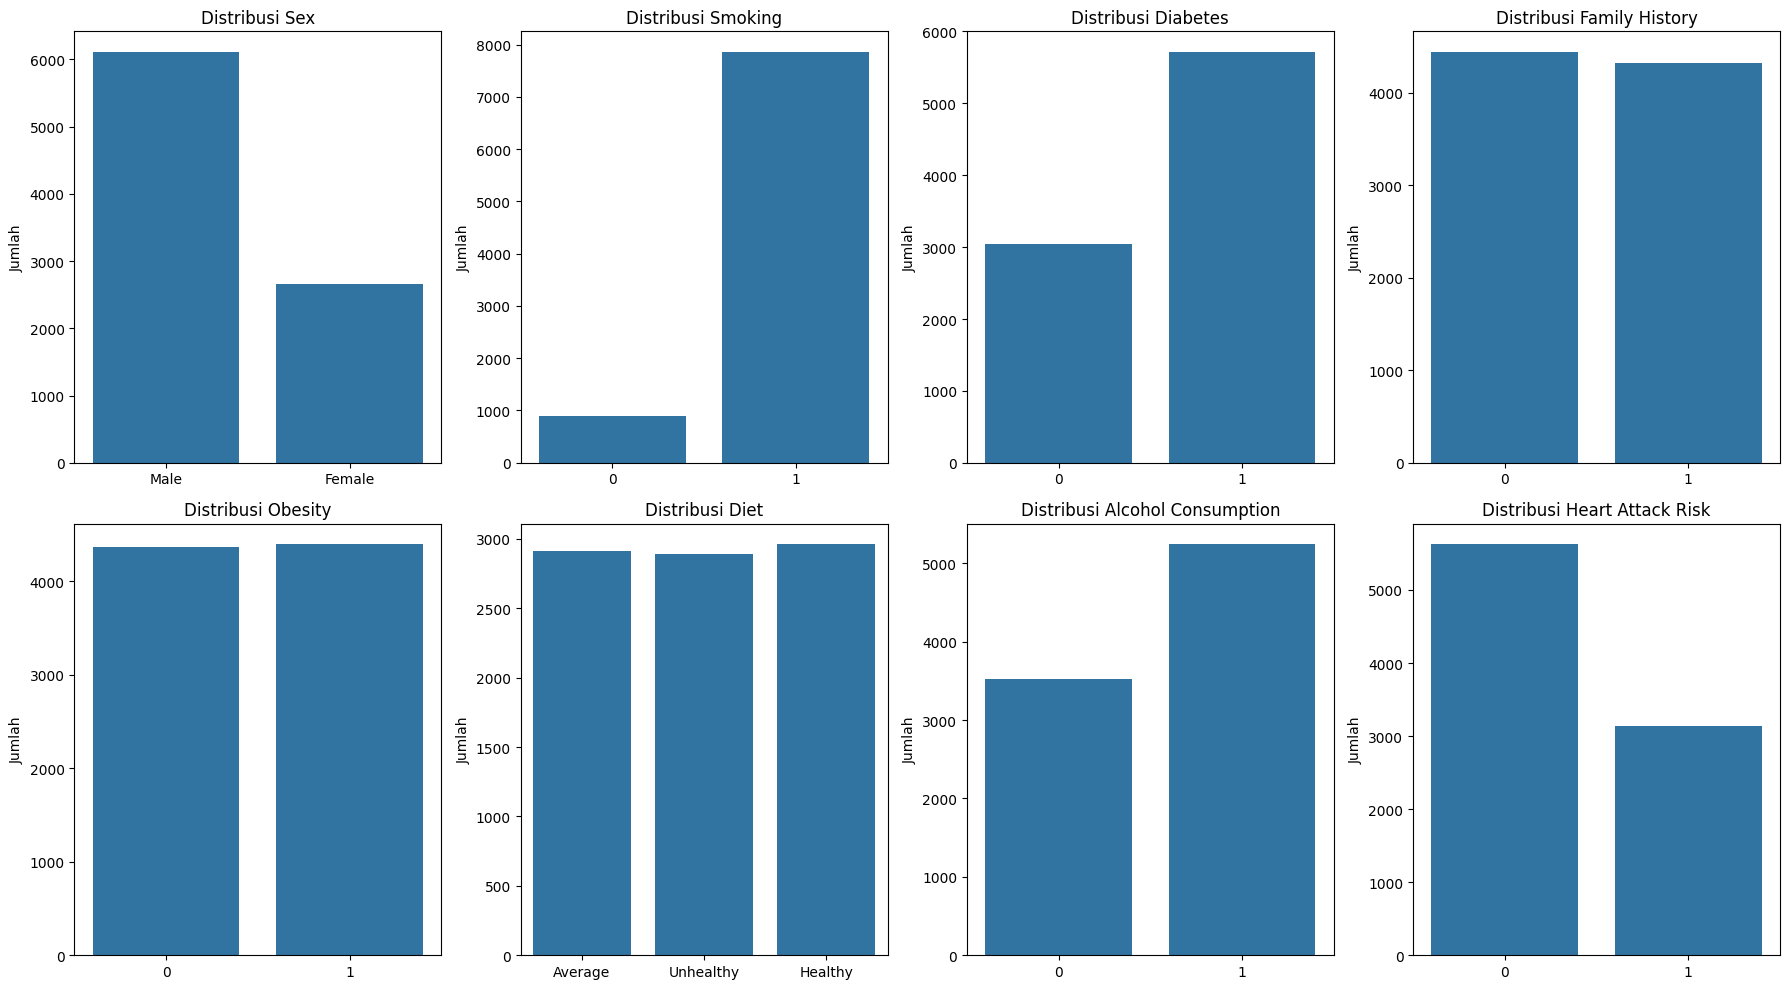

In [135]:
cat = ['Sex', 'Smoking', 'Diabetes', 'Family History', 'Obesity', 'Diet', 'Alcohol Consumption', 'Heart Attack Risk']

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 10))

axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

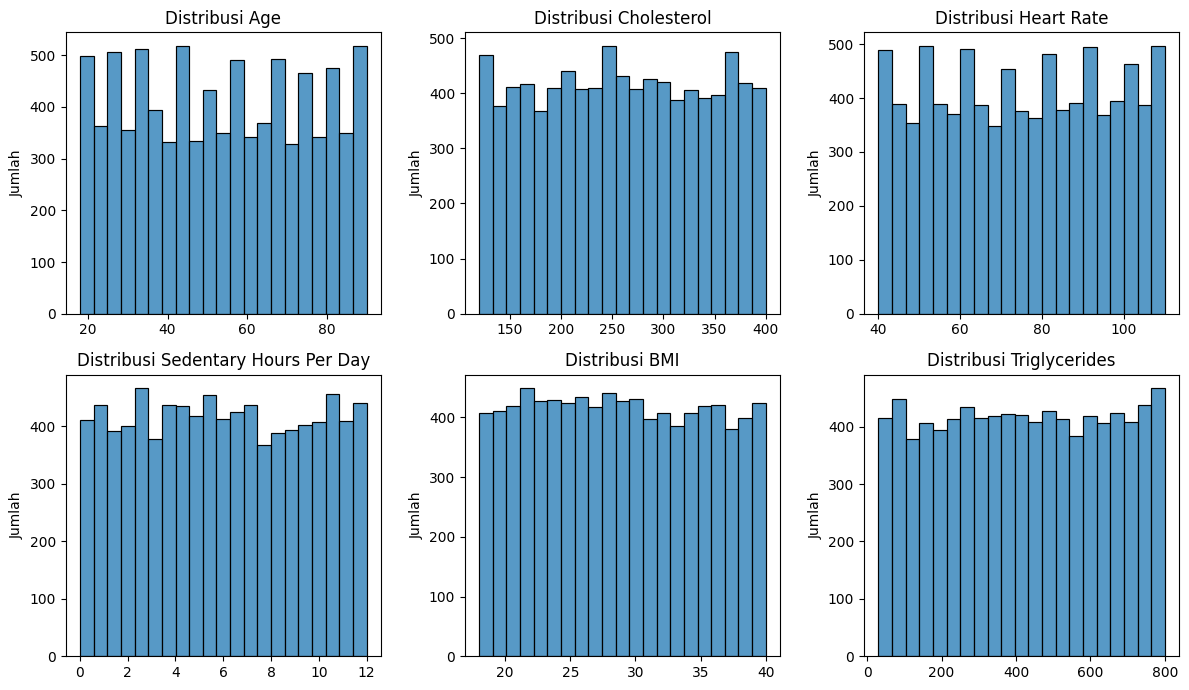

In [136]:
num_feature = df[['Age','Cholesterol', 'Heart Rate', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides']]

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 7))

axes = axes.flatten()

for i, col in enumerate(num_feature):
   sns.histplot(df[col], ax = axes[i])
   axes[i].set_title(f'Distribusi {col}', fontsize=12)
   axes[i].set_xlabel('')
   axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

**Cek Outlier**

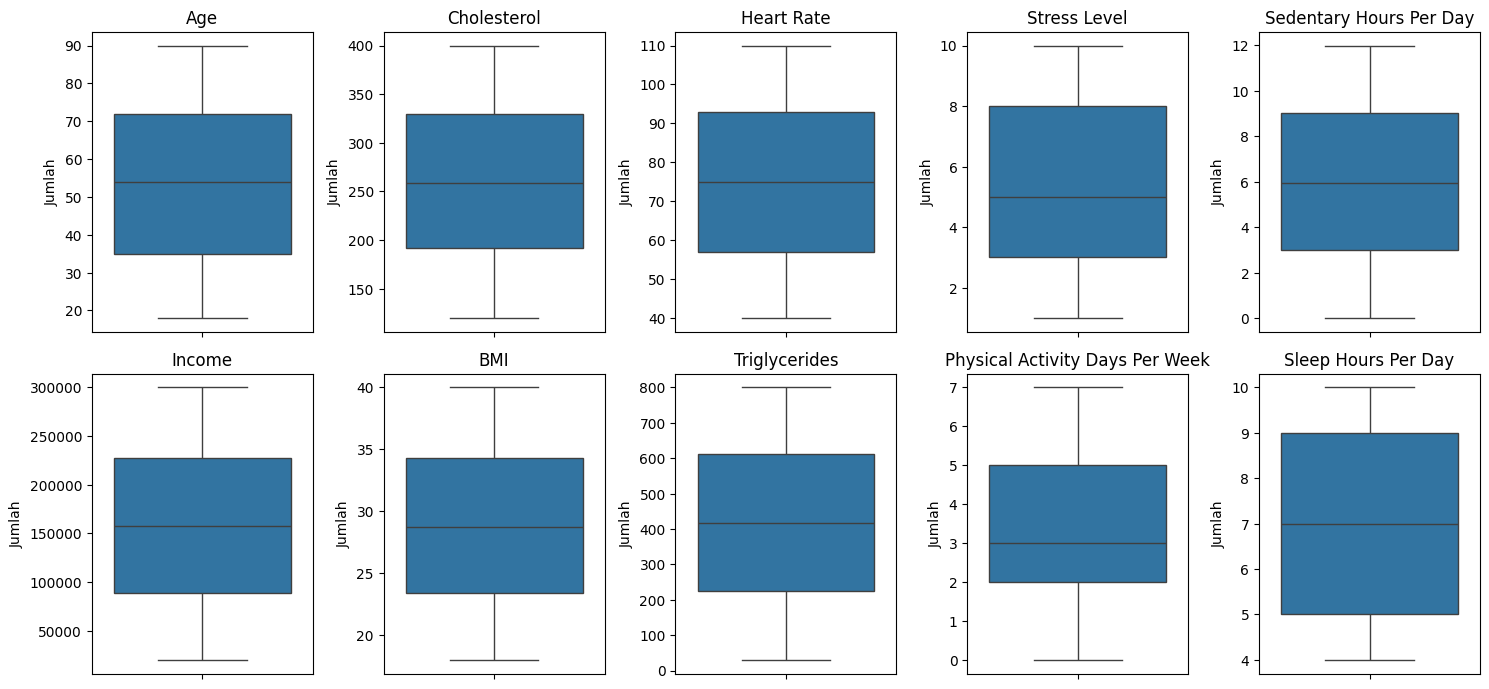

In [137]:
num_feature2 = df[['Age',
 'Cholesterol',
 'Heart Rate',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',]]

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 7))

axes = axes.flatten()

for i, col in enumerate(num_feature2):
   sns.boxplot(df[col], ax = axes[i])
   axes[i].set_title(f'{col}', fontsize=12)
   axes[i].set_xlabel('')
   axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

**Membuat Heatmap Korelasi**

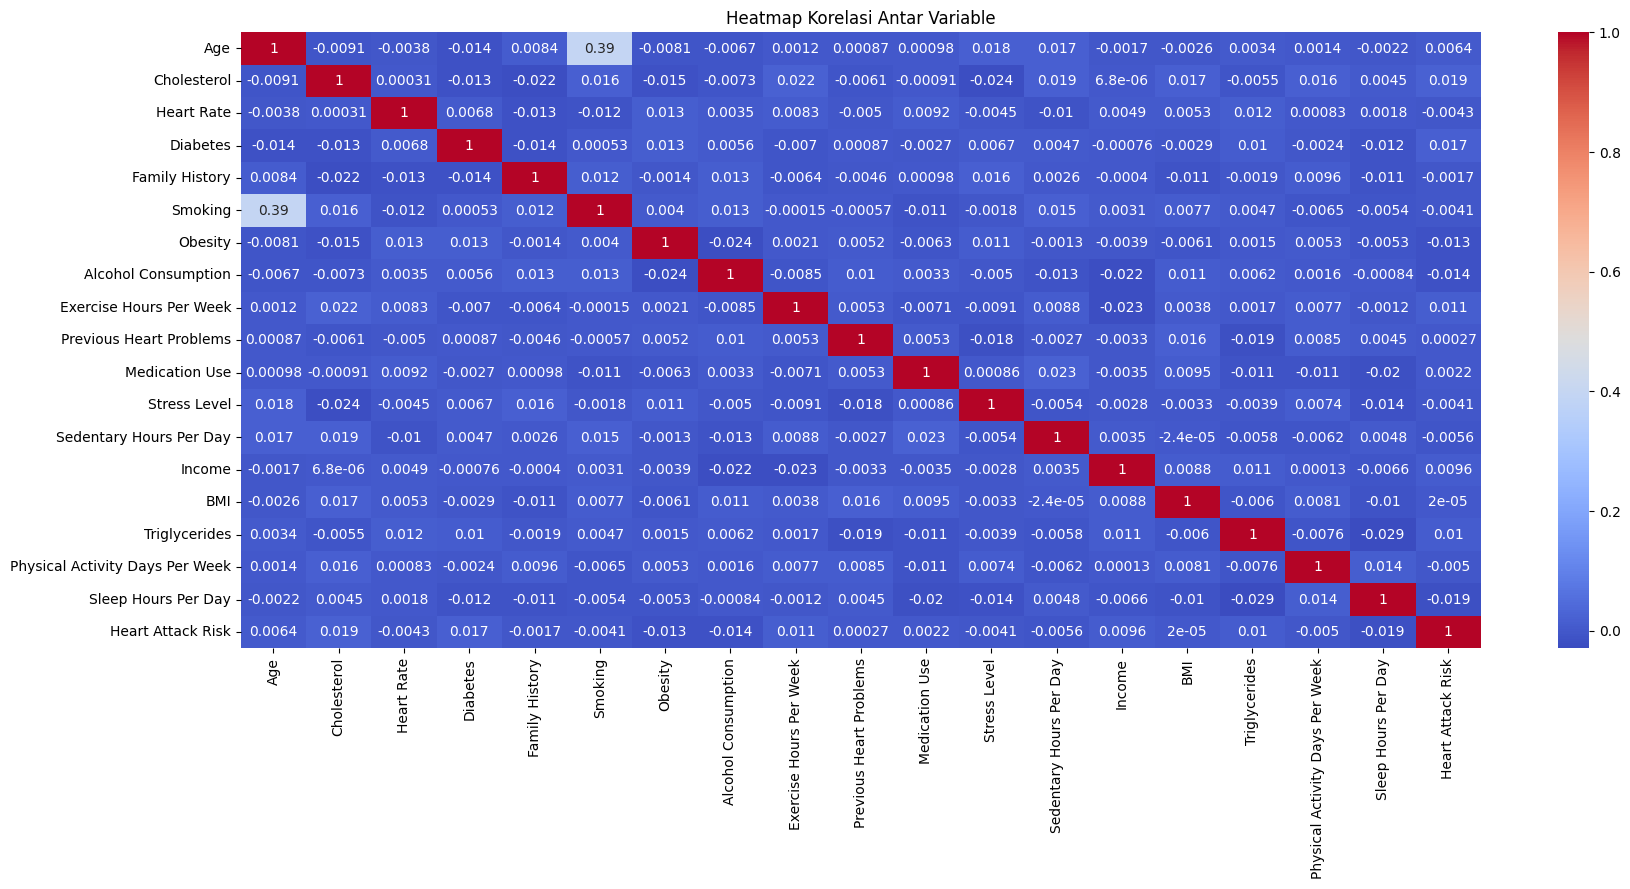

In [138]:
corr = df.select_dtypes(include = 'number').corr()

plt.figure(figsize = (20, 8))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variable')
plt.show()



> **Hubungan linear antar variabel sangat lemah.**



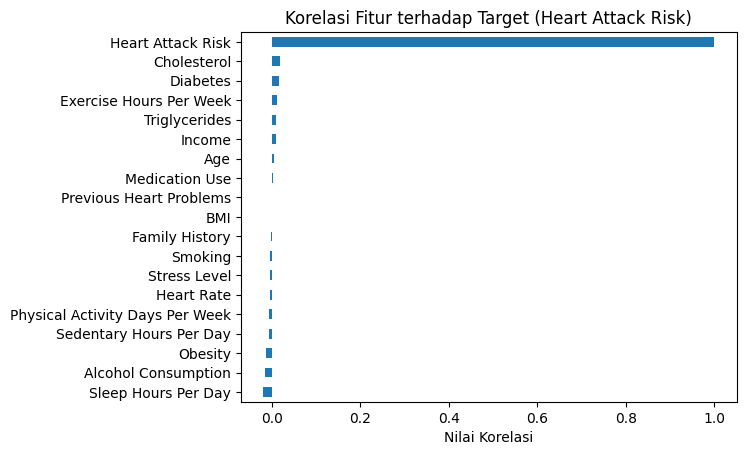

In [139]:
corr_target = corr['Heart Attack Risk'].sort_values(ascending=True)
# Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')
corr_target.plot(kind='barh')
plt.title("Korelasi Fitur terhadap Target (Heart Attack Risk)")
plt.xlabel("Nilai Korelasi")
plt.show()



> **Korelasi masing-masing fitur terhadap target (Heart Attack Risk) menunjukkan bahwa tidak ada fitur dengan hubungan linear yang kuat terhadap target.**



**Membandingkan distribusi setiap fitur numerik terhadap variabel target**

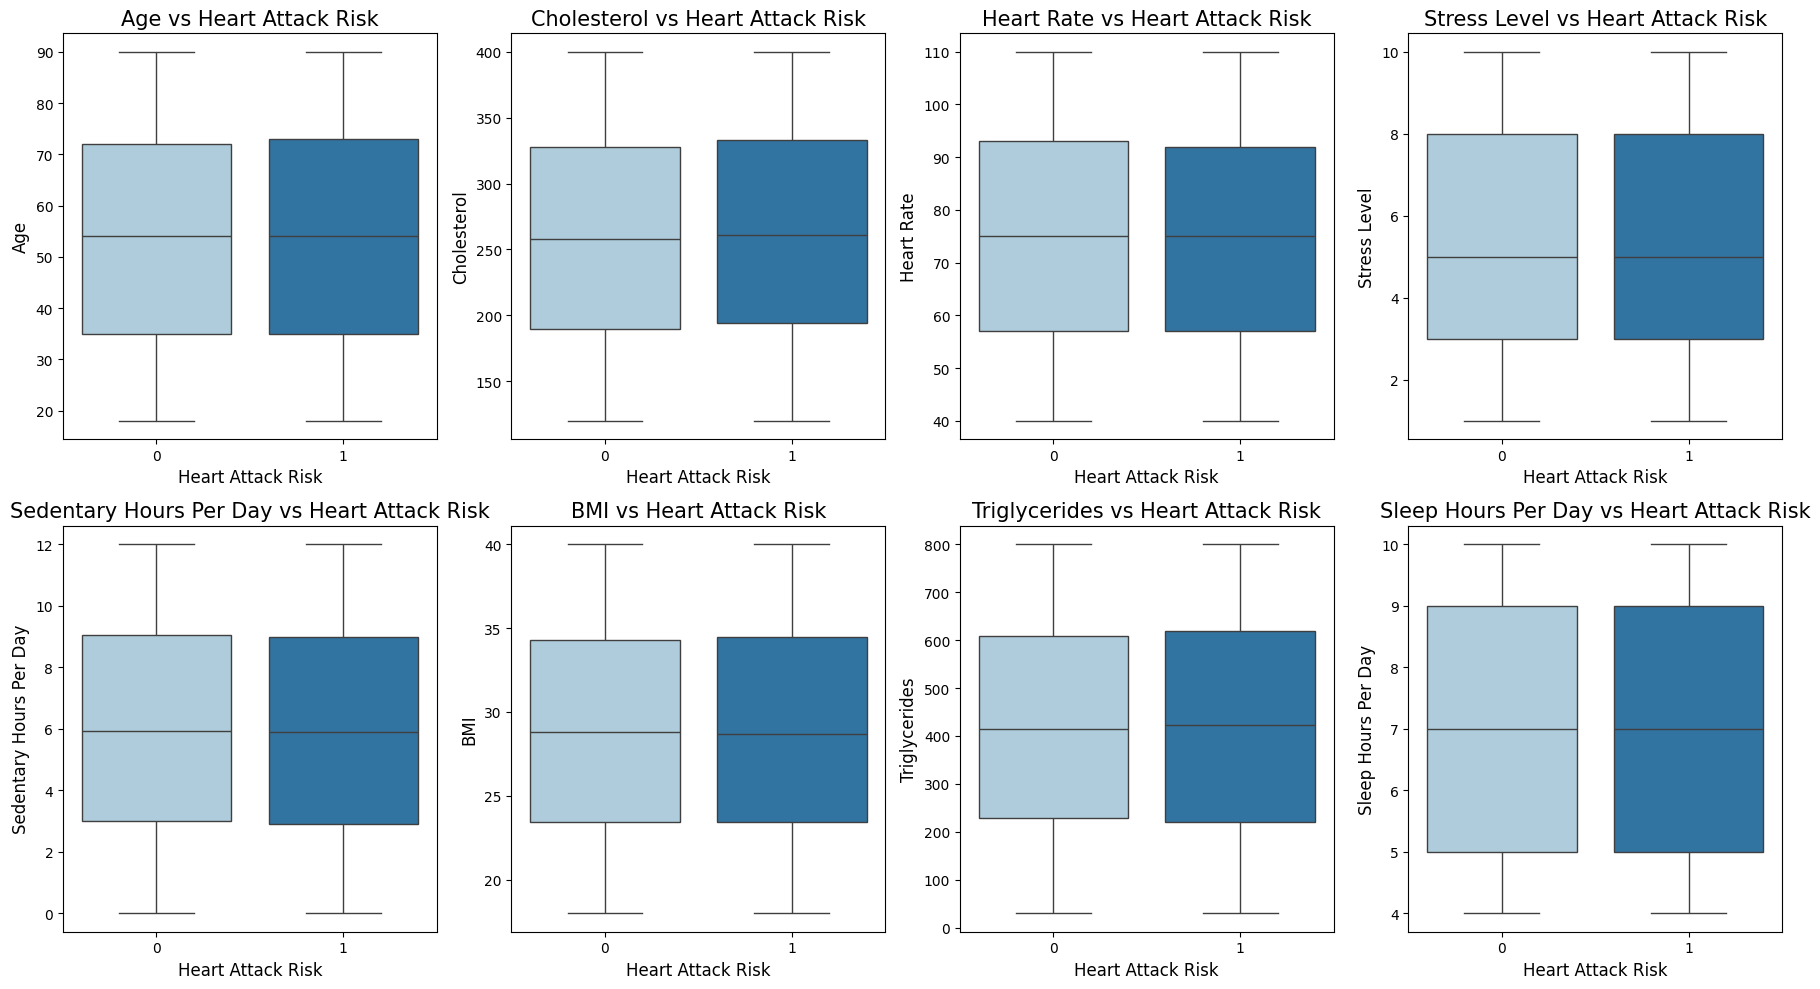

In [140]:
features = ['Age', 'Cholesterol', 'Heart Rate', 'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Sleep Hours Per Day']

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 10))

axes = axes.flatten()

for i, col in enumerate(features):
   sns.boxplot(ax = axes[i], x = 'Heart Attack Risk', y =col, data=df, palette='Paired')
   axes[i].set_title(f'{col} vs Heart Attack Risk', fontsize=15)
   axes[i].set_xlabel('Heart Attack Risk', fontsize=12)
   axes[i].set_ylabel(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()



> **Hubungan fitur numerik terhadap Heart Attack Risk menunjukkan bahwa distribusi tiap fitur pada kelas risiko 0 dan 1 relatif serupa.**



## 2.&nbsp;Preprocessing

In [141]:
df_copy = df.copy()

In [142]:
columns_cat = df_copy.select_dtypes(include = ['object']).columns.to_list()
columns_cat

['Patient ID',
 'Sex',
 'Blood Pressure',
 'Diet',
 'Country',
 'Continent',
 'Hemisphere']

### 2.1.&nbsp;Feature Engineering

**Melakukan sedikit *Feature Engineering* dengan mengubah Blood Pressure dengan menjadikannya 2 fitur numerik, dan kemudian hapus kolom Blood Pressure**

In [143]:
df_copy['Blood Pressure'].head()

,Blood Pressure
0,158/88
1,165/93
2,174/99
3,163/100
4,91/88


In [144]:
df_copy[['BP-Systolic','BP_Diastolic']] = (df_copy['Blood Pressure'].str.split('/', expand = True)).astype(int)
df_copy.drop(columns = ['Blood Pressure'], inplace = True)

In [145]:
df_copy['BP-Systolic'].head()

,BP-Systolic
0,158
1,165
2,174
3,163
4,91


In [146]:
df_copy['BP_Diastolic'].head()

,BP_Diastolic
0,88
1,93
2,99
3,100
4,88


In [147]:
columns_cat2 = df_copy.select_dtypes(include = ['object']).columns.to_list()
columns_cat2

['Patient ID', 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']

In [148]:
columns_num = df_copy.select_dtypes(include = ['number']).columns.to_list()
columns_num

['Age',
 'Cholesterol',
 'Heart Rate',
 'Diabetes',
 'Family History',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Exercise Hours Per Week',
 'Previous Heart Problems',
 'Medication Use',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'Heart Attack Risk',
 'BP-Systolic',
 'BP_Diastolic']

### 2.2.&nbsp;Encode Categorical Data (Label Encoding/One-Hot Encoding)

In [149]:
df_encoded = pd.get_dummies(df_copy, columns=columns_cat2, drop_first=True)
df_encoded.to_pickle('df_encoded.pkl')

### 2.3.&nbsp;Feature Selection

In [178]:
X = df_copy.drop(columns = ['Patient ID', 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk'])
y = df_copy['Heart Attack Risk']

In [179]:
X = X.reset_index(drop = True) # untuk mengurutkan kembali indeksnya
y = y.reset_index(drop = True)

### 2.4.&nbsp;Scaling / Normalization

In [180]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



> Menggunakan Skala tidak berpengaruh apa apa terhadap hasil



### 2.5.&nbsp;Split Dataset

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## 4.&nbsp;Model Selection

In [182]:
logreg = LogisticRegression() # instansiasi objek LogisticRegression

## 5.&nbsp;Model Training

In [183]:
model_logreg = logreg.fit(X_train, y_train) #training, setelah selesai, kita dapatkan modelnya yaitu model_logreg

## 6.&nbsp;Model Evaluation

In [184]:
y_pred_train = model_logreg.predict(X_train)
y_pred_test = model_logreg.predict(X_test)

In [185]:
print('training accuracy: ', accuracy_score(y_train, y_pred_train))
print('testing accuracy: ', accuracy_score(y_test, y_pred_test))

training accuracy:  0.6417974322396577
testing accuracy:  0.6417569880205363


## 7.&nbsp;Model Deployment

In [186]:
pickle.dump(model_logreg, open('model_logreg.pkl', 'wb'))

In [187]:
!pip install Flask==3.0.0 pyngrok==7.1.2

In [188]:
from pyngrok import ngrok
from flask import Flask, jsonify, request
from json import JSONEncoder

In [189]:
ngrok_key = '' # gunakan token masing-masing dari ngrok. jangan gunakan token ini
port = 4999

### a.&nbsp;Deployment URL

In [190]:
ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

ERROR:pyngrok.process.ngrok:t=2026-02-01T14:51:27+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-02-01T14:51:27+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-02-01T14:51:27+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

### b.&nbsp;Setup API & Run

In [ ]:
# membuat API dan menjalankan web server sederhana dengan framework Flask

app = Flask(__name__)

# fungsi homepage, mengembalikan json
@app.route('/', methods = ['GET'])
def index(): # merepresentasikan satu page
  return {"pesan":"ini halaman homepage"}

@app.route('/predict', methods = ['GET'])
def predict():
  data = request.json
  df_new = pd.DataFrame(data, index = [0])

  # load encoder yg dipakai untuk pre-processing. JANGAN BUAT ENCODER BARU
  with open('/content/label_encoder_department.pkl', 'rb') as file:
    label_encoder_department = pickle.load(file)

  with open('/content/label_encoder_education.pkl', 'rb') as file:
    label_encoder_education = pickle.load(file)

  with open('/content/label_encoder_gender.pkl', 'rb') as file:
    label_encoder_gender = pickle.load(file)

  with open('/content/label_encoder_recruitment_channel.pkl', 'rb') as file:
    label_encoder_recruitment_channel = pickle.load(file)

  with open('/content/label_encoder_region.pkl', 'rb') as file:
    label_encoder_region = pickle.load(file)

  # encode data baru dengan encoder2 di atas
  df_new['department'] = label_encoder_department.transform(df_new['department']) # JANGAN pakai fungsi FIT_TRANSFORM()
  df_new['education'] = label_encoder_education.transform(df_new['education'])
  df_new['gender'] = label_encoder_gender.transform(df_new['gender'])
  df_new['recruitment_channel'] = label_encoder_recruitment_channel.transform(df_new['recruitment_channel'])
  df_new['region'] = label_encoder_region.transform(df_new['region'])

  # load model untuk prediksi
  with open('/content/model_logreg.pkl', 'rb') as file:
    model_logreg = pickle.load(file)

  y_pred = model_logreg.predict(df_new)
  y_pred_proba = model_logreg.predict_proba(df_new)
  y_pred_proba = y_pred_proba * 100

  return jsonify({"status_prediksi":"berhasil",
                  "is_promoted":y_pred.tolist(),
                  "probability":y_pred_proba.tolist()})


if __name__ == '__main__':
  app.run(port = port)